### problem-2
## 2. Decision Support on Irrigation and Fertilization 
## Objective: Determine whether fertilization or irrigation is needed based on weather, rainfall, and soil conditions and local crop growing costs.


In [100]:
import pandas as pd
from IPython.display import display,HTML
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [101]:
df=pd.read_csv("crop_yield.csv")
# df=df.head(10000)

In [102]:
df.rename(columns=lambda x:x.strip())

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [103]:
df_num=df.copy(deep=True)
col=df_num.columns
print(col)

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')


In [104]:
df_num=df_num[df_num['Yield_tons_per_hectare']>=0]
df_num.shape

(999769, 10)

In [105]:
df_K=df_num.copy(deep=True)


In [106]:
display(HTML(df_K.head(10).to_html()))

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


## remove 'Fertilizer_Used','Irrigation_Used','Yield_tons_per_hectare','Crop' columns.

In [108]:

display('df_K:',HTML(df_K.head(10).to_html()))

df_K1=df_K.drop(columns=['Fertilizer_Used','Irrigation_Used','Yield_tons_per_hectare','Crop'])

display('df_K1:',HTML(df_K1.head(10).to_html()))

'df_K:'

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


'df_K1:'

,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest
0,West,Sandy,897.077239,27.676966,Cloudy,122
1,South,Clay,992.673282,18.026142,Rainy,140
2,North,Loam,147.998025,29.794042,Sunny,106
3,North,Sandy,986.866331,16.644190,Rainy,146
4,South,Silt,730.379174,31.620687,Cloudy,110
5,South,Silt,797.471182,37.704974,Rainy,74
6,West,Clay,357.902357,31.593431,Rainy,90
7,South,Sandy,441.131154,30.887107,Sunny,61
8,North,Silt,181.587861,26.752729,Sunny,127
9,West,Sandy,395.048968,17.646199,Rainy,140


## preparing the datasets for clustering

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def prepare_for_clustering(df):
    """
    Prepare data for K-means clustering by standardizing numerical features
    and one-hot encoding categorical features.
    
    Parameters:
    -----------
    df : pandas.DataFrame5.949288
        Input DataFrame with agricultural data
        
    Returns:
    --------
    pandas.DataFrame
        Processed DataFrame ready for clustering
    dict
        Fitted transformers for future use
    """
    # Define feature types
    numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
    categorical_features = ['Region', 'Soil_Type', 'Weather_Condition']
    
    # Create preprocessing steps
    numeric_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
    
    # Create column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Fit and transform the data
    X_transformed = preprocessor.fit_transform(df)
    
    # Get feature names after transformation
    numeric_cols = numerical_features
    categorical_cols = []
    for i, feature in enumerate(categorical_features):
        categories = preprocessor.named_transformers_['cat'].categories_[i][1:]
        categorical_cols.extend([f"{feature}_{cat}" for cat in categories])
    
    # Create new DataFrame with transformed features
    feature_names = numeric_cols + categorical_cols
    df_transformed = pd.DataFrame(
        X_transformed,
        columns=feature_names,
        index=df.index
    )
    
   # Add yield category as a separate column (not to be used in clustering)
    #df_transformed['yield_category'] = df['yield_category']
    
    return df_transformed, preprocessor

def print_cluster_data_summary(df_original, df_transformed):
    """
    Print summary statistics of the original and transformed data
    """
    print("\nOriginal Data Summary:")
    print("-" * 50)
    print(df_original.describe())
    
    print("\nTransformed Data Summary:")
    print("-" * 50)
    print(df_transformed.describe())

# Process the data
df_cluster, preprocessor = prepare_for_clustering(df_K1) # dataset need to preprocess

# Print feature names and first few rows
print("\nFeatures prepared for clustering:")
print("-" * 50)
print("\nFeature names:")
for col in df_cluster.columns:
    print(f"- {col}")

print("\nFirst few rows of prepared data:")
print(df_cluster.head())

# Print summary statistics
print_cluster_data_summary(df_K1, df_cluster)


Features prepared for clustering:
--------------------------------------------------

Feature names:
- Rainfall_mm
- Temperature_Celsius
- Days_to_Harvest
- Region_North
- Region_South
- Region_West
- Soil_Type_Clay
- Soil_Type_Loam
- Soil_Type_Peaty
- Soil_Type_Sandy
- Soil_Type_Silt
- Weather_Condition_Rainy
- Weather_Condition_Sunny

First few rows of prepared data:
   Rainfall_mm  Temperature_Celsius  Days_to_Harvest  Region_North  \
0     0.885643             0.507078         0.696629           0.0   
1     0.991861             0.121045         0.898876           0.0   
2     0.053330             0.591761         0.516854           1.0   
3     0.985409             0.065766         0.966292           1.0   
4     0.700422             0.664827         0.561798           0.0   

   Region_South  Region_West  Soil_Type_Clay  Soil_Type_Loam  Soil_Type_Peaty  \
0           0.0          1.0             0.0             0.0              0.0   
1           1.0          0.0             1.0


## Original and clustering datasets

In [112]:
display('df_K1:',HTML(df_K1.head(10).to_html()))
display('df_cluster:',HTML(df_cluster.head(10).to_html()))


'df_K1:'

,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest
0,West,Sandy,897.077239,27.676966,Cloudy,122
1,South,Clay,992.673282,18.026142,Rainy,140
2,North,Loam,147.998025,29.794042,Sunny,106
3,North,Sandy,986.866331,16.644190,Rainy,146
4,South,Silt,730.379174,31.620687,Cloudy,110
5,South,Silt,797.471182,37.704974,Rainy,74
6,West,Clay,357.902357,31.593431,Rainy,90
7,South,Sandy,441.131154,30.887107,Sunny,61
8,North,Silt,181.587861,26.752729,Sunny,127
9,West,Sandy,395.048968,17.646199,Rainy,140


'df_cluster:'

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Weather_Condition_Rainy,Weather_Condition_Sunny
0,0.885643,0.507078,0.696629,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.991861,0.121045,0.898876,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.053330,0.591761,0.516854,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.985409,0.065766,0.966292,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.700422,0.664827,0.561798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.774969,0.908199,0.157303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.286558,0.663737,0.337079,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.379035,0.635484,0.011236,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.090652,0.470108,0.752809,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.327832,0.105847,0.898876,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### finding optimal K-Value by K-means

1.5


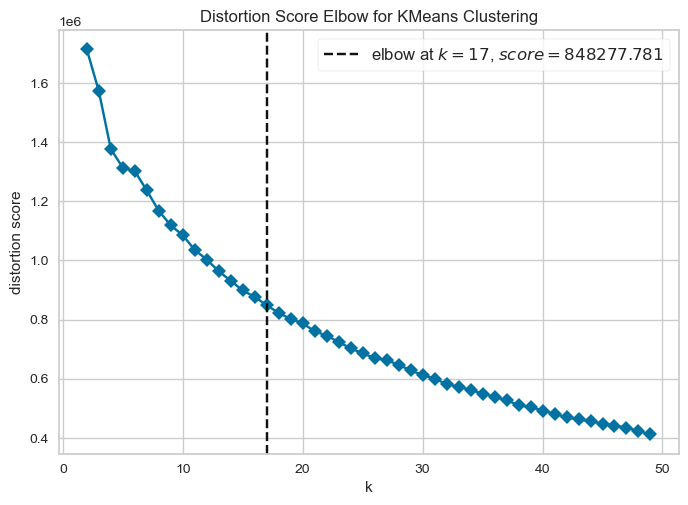

best k =  17


In [114]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
print(yellowbrick.__version__)

km = KMeans(random_state=42,max_iter=200, algorithm='elkan')
visualizer = KElbowVisualizer(km, k=(2,50), timings=False, distance_metric='euclidean', metric='distortion')
visualizer.fit(df_cluster)
visualizer.show() 
best_k = visualizer.elbow_value_
print("best k = ",best_k)

### K-means: Clustering the data and assigning the cluster values to clustering nad original datasets

In [116]:
km = KMeans(n_clusters=best_k)
km = km.fit(df_cluster)

opt=km.labels_
df_K1_Kcluster=df_K1.copy(deep=True)

# add cluster column
df_K1_Kcluster['Cluster']=opt
display('df_K1_Kcluster Data:',HTML(df_K1_Kcluster.head(10).to_html()))


'df_K1_Kcluster Data:'

,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest,Cluster
0,West,Sandy,897.077239,27.676966,Cloudy,122,12
1,South,Clay,992.673282,18.026142,Rainy,140,6
2,North,Loam,147.998025,29.794042,Sunny,106,7
3,North,Sandy,986.866331,16.644190,Rainy,146,15
4,South,Silt,730.379174,31.620687,Cloudy,110,1
5,South,Silt,797.471182,37.704974,Rainy,74,5
6,West,Clay,357.902357,31.593431,Rainy,90,10
7,South,Sandy,441.131154,30.887107,Sunny,61,11
8,North,Silt,181.587861,26.752729,Sunny,127,7
9,West,Sandy,395.048968,17.646199,Rainy,140,12


# evaluate K-means model and hierarchical clustering model

In [120]:
display('df_K1:',HTML(df_K1.head(10).to_html()))
df_K1_original=df_K1.copy(deep=True)
display('df_K1_original:',HTML(df_K1_original.head(10).to_html()))

display('df_K1_Kcluster:',HTML(df_K1_Kcluster.head(10).to_html()))


'df_K1:'

,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest
0,West,Sandy,897.077239,27.676966,Cloudy,122
1,South,Clay,992.673282,18.026142,Rainy,140
2,North,Loam,147.998025,29.794042,Sunny,106
3,North,Sandy,986.866331,16.644190,Rainy,146
4,South,Silt,730.379174,31.620687,Cloudy,110
5,South,Silt,797.471182,37.704974,Rainy,74
6,West,Clay,357.902357,31.593431,Rainy,90
7,South,Sandy,441.131154,30.887107,Sunny,61
8,North,Silt,181.587861,26.752729,Sunny,127
9,West,Sandy,395.048968,17.646199,Rainy,140


'df_K1_original:'

,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest
0,West,Sandy,897.077239,27.676966,Cloudy,122
1,South,Clay,992.673282,18.026142,Rainy,140
2,North,Loam,147.998025,29.794042,Sunny,106
3,North,Sandy,986.866331,16.644190,Rainy,146
4,South,Silt,730.379174,31.620687,Cloudy,110
5,South,Silt,797.471182,37.704974,Rainy,74
6,West,Clay,357.902357,31.593431,Rainy,90
7,South,Sandy,441.131154,30.887107,Sunny,61
8,North,Silt,181.587861,26.752729,Sunny,127
9,West,Sandy,395.048968,17.646199,Rainy,140


'df_K1_Kcluster:'

,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest,Cluster
0,West,Sandy,897.077239,27.676966,Cloudy,122,12
1,South,Clay,992.673282,18.026142,Rainy,140,6
2,North,Loam,147.998025,29.794042,Sunny,106,7
3,North,Sandy,986.866331,16.644190,Rainy,146,15
4,South,Silt,730.379174,31.620687,Cloudy,110,1
5,South,Silt,797.471182,37.704974,Rainy,74,5
6,West,Clay,357.902357,31.593431,Rainy,90,10
7,South,Sandy,441.131154,30.887107,Sunny,61,11
8,North,Silt,181.587861,26.752729,Sunny,127,7
9,West,Sandy,395.048968,17.646199,Rainy,140,12


In [121]:
print(df_K1_original.describe())
print(df_K1_Kcluster.describe())


         Rainfall_mm  Temperature_Celsius  Days_to_Harvest
count  999769.000000        999769.000000    999769.000000
mean      550.077823            27.506079       104.495141
std       259.804329             7.220488        25.953328
min       100.000896            15.000034        60.000000
25%       325.062906            21.256078        82.000000
50%       550.229205            27.509509       104.000000
75%       774.797949            33.754459       127.000000
max       999.998098            39.999997       149.000000
         Rainfall_mm  Temperature_Celsius  Days_to_Harvest        Cluster
count  999769.000000        999769.000000    999769.000000  999769.000000
mean      550.077823            27.506079       104.495141       7.859067
std       259.804329             7.220488        25.953328       4.924361
min       100.000896            15.000034        60.000000       0.000000
25%       325.062906            21.256078        82.000000       3.000000
50%       550.229205     

## use random forest to evaluate K-means model, Weather_Condition is the lable.

### Random Forest for df_K1_original

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

label_encoder = LabelEncoder()
df_K1_original['Weather_Condition'] = label_encoder.fit_transform(df_K1_original['Weather_Condition'])

df_K1_original_encoded = pd.get_dummies(df_K1_original, columns=['Region', 'Soil_Type'], drop_first=True)

display('df_K1_original_encoded:',HTML(df_K1_original_encoded.head(10).to_html()))

# split features and target variables
X = df_K1_original_encoded.drop(columns=['Weather_Condition'])
y = df_K1_original_encoded['Weather_Condition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create random forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# evaluate model 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#  Precision, Recall 和 F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred))

'df_K1_original_encoded:'

,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt
0,897.077239,27.676966,0,122,False,False,True,False,False,False,True,False
1,992.673282,18.026142,1,140,False,True,False,True,False,False,False,False
2,147.998025,29.794042,2,106,True,False,False,False,True,False,False,False
3,986.866331,16.644190,1,146,True,False,False,False,False,False,True,False
4,730.379174,31.620687,0,110,False,True,False,False,False,False,False,True
5,797.471182,37.704974,1,74,False,True,False,False,False,False,False,True
6,357.902357,31.593431,1,90,False,False,True,True,False,False,False,False
7,441.131154,30.887107,2,61,False,True,False,False,False,False,True,False
8,181.587861,26.752729,2,127,True,False,False,False,False,False,False,True
9,395.048968,17.646199,1,140,False,False,True,False,False,False,True,False


Accuracy: 0.3355
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.34      0.34     66556
           1       0.33      0.33      0.33     66805
           2       0.34      0.33      0.33     66593

    accuracy                           0.34    199954
   macro avg       0.34      0.34      0.34    199954
weighted avg       0.34      0.34      0.34    199954



### Random Forest for df_K1_Kcluster

In [126]:
label_encoder = LabelEncoder()
df_K1_Kcluster['Weather_Condition'] = label_encoder.fit_transform(df_K1_Kcluster['Weather_Condition'])

df_K1_Kcluster_encoded = pd.get_dummies(df_K1_Kcluster, columns=['Region', 'Soil_Type'], drop_first=True)

display('df_K1_Kcluster_encoded:',HTML(df_K1_Kcluster_encoded.head(10).to_html()))

# split features and target variables
X = df_K1_Kcluster_encoded.drop(columns=['Weather_Condition'])
y = df_K1_Kcluster_encoded['Weather_Condition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create random forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


# evaluate model 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall 和 F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred))

'df_K1_Kcluster_encoded:'

,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest,Cluster,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt
0,897.077239,27.676966,0,122,12,False,False,True,False,False,False,True,False
1,992.673282,18.026142,1,140,6,False,True,False,True,False,False,False,False
2,147.998025,29.794042,2,106,7,True,False,False,False,True,False,False,False
3,986.866331,16.644190,1,146,15,True,False,False,False,False,False,True,False
4,730.379174,31.620687,0,110,1,False,True,False,False,False,False,False,True
5,797.471182,37.704974,1,74,5,False,True,False,False,False,False,False,True
6,357.902357,31.593431,1,90,10,False,False,True,True,False,False,False,False
7,441.131154,30.887107,2,61,11,False,True,False,False,False,False,True,False
8,181.587861,26.752729,2,127,7,True,False,False,False,False,False,False,True
9,395.048968,17.646199,1,140,12,False,False,True,False,False,False,True,False


Accuracy: 0.9026
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     66556
           1       0.88      0.87      0.87     66805
           2       0.98      0.98      0.98     66593

    accuracy                           0.90    199954
   macro avg       0.90      0.90      0.90    199954
weighted avg       0.90      0.90      0.90    199954



### By compare the Accuracy and other mitrixes for K-means model and original data, the Accuracy and other mitrixes of K-means model are much higher after add cluster column than before, so the K-means cluster model is doing well.

# data anylisis 

### adding yeilds, fertilizer, irrigation and crop to the datasets

In [132]:
df_K1['Cluster']=opt# K-means model

# Yeilds
df_K1['Yield_tons_per_hectare']=df_K['Yield_tons_per_hectare']

# crop

df_K1['Crop']=df_K['Crop']

# fertilizer

df_K1['Fertilizer_Used']=df_K['Fertilizer_Used']

# irrigation 

df_K1['Irrigation_Used']=df_K['Irrigation_Used']


In [133]:
display('df_K1:',HTML(df_K1.head(10).to_html()))


'df_K1:'

,Region,Soil_Type,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest,Cluster,Yield_tons_per_hectare,Crop,Fertilizer_Used,Irrigation_Used
0,West,Sandy,897.077239,27.676966,Cloudy,122,12,6.555816,Cotton,False,True
1,South,Clay,992.673282,18.026142,Rainy,140,6,8.527341,Rice,True,True
2,North,Loam,147.998025,29.794042,Sunny,106,7,1.127443,Barley,False,False
3,North,Sandy,986.866331,16.644190,Rainy,146,15,6.517573,Soybean,False,True
4,South,Silt,730.379174,31.620687,Cloudy,110,1,7.248251,Wheat,True,True
5,South,Silt,797.471182,37.704974,Rainy,74,5,5.898416,Soybean,False,True
6,West,Clay,357.902357,31.593431,Rainy,90,10,2.652392,Wheat,False,False
7,South,Sandy,441.131154,30.887107,Sunny,61,11,5.829542,Rice,True,True
8,North,Silt,181.587861,26.752729,Sunny,127,7,2.943716,Wheat,True,False
9,West,Sandy,395.048968,17.646199,Rainy,140,12,3.707293,Wheat,False,True


### Yield score from each cluster by different crops 

In [135]:
def calculate_yield_distribution(crop_data):
    
    yield_distribution = []
    for fert in [0, 1]:
        for irr in [0, 1]:
            # Filter for current combination
            combo_data = crop_data[
                (crop_data['Fertilizer_Used'] == fert) & 
                (crop_data['Irrigation_Used'] == irr)
            ]
            
            if len(combo_data) > 0:
                # Get value counts for this combination
                counts = combo_data['Yield_tons_per_hectare'].value_counts()
                yield_distribution.append({
                    'Fertilizer_Used': fert,
                    'Irrigation_Used': irr,
                    'yield_counts': counts.to_dict()
                })
    
    return yield_distribution


In [136]:
for i in range(best_k):
    # Filter the dataset for the current cluster
    cluster_data = df_K1[df_K1['Cluster'] == i]
    print(f'Cluster {i} Analysis:')
    
    # Iterate over each unique crop in the 'Crops' column
    for crop_name in cluster_data['Crop'].unique():
        crop_data = cluster_data[cluster_data['Crop'] == crop_name]
        
        if len(crop_data) == 0:
            continue
            
        print(f'\nCrop: {crop_name}')
        
        # Calculate yield distribution (assuming this function exists)
        yield_distribution = calculate_yield_distribution(crop_data)
        
        # Calculate mean yield score for different combinations
        mean_yield = crop_data.groupby(['Fertilizer_Used', 'Irrigation_Used'])['Yield_tons_per_hectare'].mean().reset_index()
        
        print('Mean Yield Score by Treatment:')
        display(HTML(mean_yield.to_html()))
        
        print('\nYield Distribution by Treatment:')
        
        # Determine the best action based on the highest mean yield
        max_mean_yield = mean_yield['Yield_tons_per_hectare'].max()
        best_action = mean_yield[mean_yield['Yield_tons_per_hectare'] == max_mean_yield]
        
        # Determine the best action label
        if best_action.iloc[0]['Fertilizer_Used'] == 1 and best_action.iloc[0]['Irrigation_Used'] == 1:
            best_action_label = 'Both Fertilizer and Irrigation'
        elif best_action.iloc[0]['Fertilizer_Used'] == 1:
            best_action_label = 'Only Fertilizer'
        elif best_action.iloc[0]['Irrigation_Used'] == 1:
            best_action_label = 'Only Irrigation'
        else:
            best_action_label = 'No Fertilizer or Irrigation'
        
        print(f'\nBest treatment for {crop_name} in Cluster {i}: {best_action_label}')
        print(f'Mean yield score with best treatment: {max_mean_yield:.2f}')
    
    print('\n' + '=' * 50)


Cluster 0 Analysis:

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.295929
1,False,True,4.482898
2,True,False,4.766913
3,True,True,6.002542



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 0: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.293693
1,False,True,4.517427
2,True,False,4.765985
3,True,True,5.984906



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 0: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.98

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.302968
1,False,True,4.506666
2,True,False,4.800145
3,True,True,5.988435



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 0: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.260171
1,False,True,4.463908
2,True,False,4.769686
3,True,True,6.037617



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 0: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.04

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.316173
1,False,True,4.477130
2,True,False,4.836917
3,True,True,6.050621



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 0: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.05

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.277298
1,False,True,4.496043
2,True,False,4.783860
3,True,True,5.999973



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 0: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Cluster 1 Analysis:

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.341192
1,False,True,4.491117
2,True,False,4.763094
3,True,True,5.993084



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 1: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.259163
1,False,True,4.503437
2,True,False,4.778723
3,True,True,6.012744



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 1: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.01

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.325523
1,False,True,4.518921
2,True,False,4.786186
3,True,True,6.016836



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 1: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.327398
1,False,True,4.527876
2,True,False,4.800216
3,True,True,6.019373



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 1: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.314923
1,False,True,4.519487
2,True,False,4.816738
3,True,True,5.953234



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 1: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.95

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.299735
1,False,True,4.470928
2,True,False,4.785496
3,True,True,6.017353



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 1: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Cluster 2 Analysis:

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.293667
1,False,True,4.529513
2,True,False,4.825074
3,True,True,6.035925



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 2: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.04

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.313449
1,False,True,4.442421
2,True,False,4.786555
3,True,True,6.038449



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 2: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.04

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.334035
1,False,True,4.562751
2,True,False,4.775606
3,True,True,6.000956



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 2: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.303322
1,False,True,4.535466
2,True,False,4.705137
3,True,True,5.988908



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 2: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.280681
1,False,True,4.451883
2,True,False,4.774849
3,True,True,6.019119



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 2: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.289286
1,False,True,4.463689
2,True,False,4.765288
3,True,True,5.987835



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 2: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Cluster 3 Analysis:

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.274906
1,False,True,4.422653
2,True,False,4.784466
3,True,True,5.997116



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 3: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.321076
1,False,True,4.499276
2,True,False,4.817391
3,True,True,5.945914



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 3: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.95

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.358523
1,False,True,4.555568
2,True,False,4.792043
3,True,True,6.037330



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 3: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.04

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.281839
1,False,True,4.525055
2,True,False,4.778451
3,True,True,6.020878



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 3: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.323677
1,False,True,4.466240
2,True,False,4.819547
3,True,True,5.990300



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 3: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.275850
1,False,True,4.524332
2,True,False,4.847666
3,True,True,5.996306



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 3: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Cluster 4 Analysis:

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.323384
1,False,True,4.525541
2,True,False,4.802449
3,True,True,5.990367



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 4: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.258942
1,False,True,4.500563
2,True,False,4.840954
3,True,True,5.984796



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 4: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.98

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.313253
1,False,True,4.478947
2,True,False,4.807494
3,True,True,5.957188



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 4: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.96

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.247292
1,False,True,4.476265
2,True,False,4.838891
3,True,True,5.987892



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 4: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.296989
1,False,True,4.532619
2,True,False,4.858849
3,True,True,5.927106



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 4: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.93

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.290358
1,False,True,4.548074
2,True,False,4.877102
3,True,True,6.059595



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 4: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.06

Cluster 5 Analysis:

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.324824
1,False,True,4.491381
2,True,False,4.753800
3,True,True,6.052335



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 5: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.05

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.279603
1,False,True,4.466652
2,True,False,4.756132
3,True,True,5.983386



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 5: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.98

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.351217
1,False,True,4.478736
2,True,False,4.827632
3,True,True,5.997619



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 5: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.271293
1,False,True,4.461198
2,True,False,4.779326
3,True,True,5.939759



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 5: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.94

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.342398
1,False,True,4.526488
2,True,False,4.851451
3,True,True,6.031790



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 5: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.03

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.346617
1,False,True,4.538684
2,True,False,4.802695
3,True,True,5.985284



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 5: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Cluster 6 Analysis:

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.321343
1,False,True,4.528557
2,True,False,4.803189
3,True,True,6.024857



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 6: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.271173
1,False,True,4.480197
2,True,False,4.784764
3,True,True,6.015030



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 6: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.328015
1,False,True,4.437906
2,True,False,4.789091
3,True,True,5.987684



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 6: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.305144
1,False,True,4.504162
2,True,False,4.825692
3,True,True,6.049101



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 6: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.05

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.302746
1,False,True,4.472500
2,True,False,4.764939
3,True,True,6.024840



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 6: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.358777
1,False,True,4.518345
2,True,False,4.787332
3,True,True,6.019607



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 6: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Cluster 7 Analysis:

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.362078
1,False,True,4.499861
2,True,False,4.830019
3,True,True,6.018114



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 7: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.324169
1,False,True,4.556679
2,True,False,4.845490
3,True,True,6.000557



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 7: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.333923
1,False,True,4.512729
2,True,False,4.863402
3,True,True,5.987926



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 7: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.321515
1,False,True,4.533146
2,True,False,4.801837
3,True,True,5.991723



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 7: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.291464
1,False,True,4.506916
2,True,False,4.810363
3,True,True,5.981665



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 7: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.98

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.345666
1,False,True,4.512672
2,True,False,4.800187
3,True,True,5.988088



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 7: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Cluster 8 Analysis:

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.347113
1,False,True,4.479043
2,True,False,4.826323
3,True,True,6.001774



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 8: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.277520
1,False,True,4.464265
2,True,False,4.810690
3,True,True,6.013758



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 8: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.01

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.328186
1,False,True,4.470222
2,True,False,4.868490
3,True,True,5.973625



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 8: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.97

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.361816
1,False,True,4.499770
2,True,False,4.751323
3,True,True,5.985222



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 8: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.260581
1,False,True,4.514608
2,True,False,4.790923
3,True,True,5.986713



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 8: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.269261
1,False,True,4.485656
2,True,False,4.787521
3,True,True,6.033210



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 8: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.03

Cluster 9 Analysis:

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.295187
1,False,True,4.505727
2,True,False,4.819873
3,True,True,5.997708



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 9: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.311851
1,False,True,4.478119
2,True,False,4.798013
3,True,True,5.999174



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 9: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.293221
1,False,True,4.492221
2,True,False,4.790797
3,True,True,6.019073



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 9: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.314909
1,False,True,4.506942
2,True,False,4.780584
3,True,True,5.992291



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 9: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.255920
1,False,True,4.480007
2,True,False,4.810758
3,True,True,5.986157



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 9: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.288701
1,False,True,4.464371
2,True,False,4.794672
3,True,True,6.020505



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 9: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Cluster 10 Analysis:

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.305296
1,False,True,4.519447
2,True,False,4.836040
3,True,True,5.965958



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 10: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.97

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.409980
1,False,True,4.489489
2,True,False,4.784902
3,True,True,6.019422



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 10: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.287020
1,False,True,4.502893
2,True,False,4.811022
3,True,True,6.010040



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 10: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.01

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.246399
1,False,True,4.522915
2,True,False,4.745885
3,True,True,5.993988



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 10: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.315954
1,False,True,4.467312
2,True,False,4.809385
3,True,True,5.963664



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 10: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.96

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.271600
1,False,True,4.523378
2,True,False,4.748825
3,True,True,6.010171



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 10: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.01

Cluster 11 Analysis:

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.340956
1,False,True,4.503834
2,True,False,4.810976
3,True,True,6.013250



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 11: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.01

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.313809
1,False,True,4.560122
2,True,False,4.774660
3,True,True,5.983187



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 11: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.98

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.324245
1,False,True,4.454385
2,True,False,4.838881
3,True,True,6.039529



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 11: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.04

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.252782
1,False,True,4.459216
2,True,False,4.851127
3,True,True,5.961284



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 11: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.96

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.277676
1,False,True,4.479544
2,True,False,4.746865
3,True,True,6.037463



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 11: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.04

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.308337
1,False,True,4.511328
2,True,False,4.771631
3,True,True,6.027219



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 11: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.03

Cluster 12 Analysis:

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.245849
1,False,True,4.533262
2,True,False,4.789551
3,True,True,5.988697



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 12: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.263382
1,False,True,4.504722
2,True,False,4.818770
3,True,True,5.947007



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 12: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.95

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.307675
1,False,True,4.479091
2,True,False,4.843453
3,True,True,5.987999



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 12: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.363577
1,False,True,4.534975
2,True,False,4.841454
3,True,True,6.031272



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 12: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.03

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.375480
1,False,True,4.566614
2,True,False,4.813742
3,True,True,6.068162



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 12: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.07

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.317812
1,False,True,4.478000
2,True,False,4.745571
3,True,True,5.964731



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 12: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.96

Cluster 13 Analysis:

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.242007
1,False,True,4.484295
2,True,False,4.812429
3,True,True,6.013791



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 13: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.01

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.320350
1,False,True,4.529000
2,True,False,4.794691
3,True,True,5.970322



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 13: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.97

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.291184
1,False,True,4.528588
2,True,False,4.819578
3,True,True,6.037967



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 13: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.04

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.309095
1,False,True,4.502067
2,True,False,4.827517
3,True,True,5.988939



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 13: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.304956
1,False,True,4.526626
2,True,False,4.725601
3,True,True,5.990718



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 13: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.311014
1,False,True,4.494340
2,True,False,4.821923
3,True,True,5.997771



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 13: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Cluster 14 Analysis:

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.309271
1,False,True,4.532092
2,True,False,4.747448
3,True,True,6.052484



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 14: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.05

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.292243
1,False,True,4.494081
2,True,False,4.791623
3,True,True,5.955363



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 14: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.96

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.308558
1,False,True,4.464566
2,True,False,4.797111
3,True,True,6.000615



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 14: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.00

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.300424
1,False,True,4.467398
2,True,False,4.819504
3,True,True,6.009732



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 14: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.01

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.348320
1,False,True,4.500816
2,True,False,4.810009
3,True,True,5.971766



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 14: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.97

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.309602
1,False,True,4.489986
2,True,False,4.826565
3,True,True,5.923012



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 14: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.92

Cluster 15 Analysis:

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.310008
1,False,True,4.483222
2,True,False,4.768361
3,True,True,5.960677



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 15: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.96

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.344287
1,False,True,4.436277
2,True,False,4.873554
3,True,True,5.978713



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 15: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.98

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.314240
1,False,True,4.525716
2,True,False,4.817810
3,True,True,5.991284



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 15: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.278783
1,False,True,4.488540
2,True,False,4.733718
3,True,True,5.939752



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 15: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.94

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.298125
1,False,True,4.524660
2,True,False,4.819167
3,True,True,5.994659



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 15: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.99

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.328676
1,False,True,4.505431
2,True,False,4.784435
3,True,True,5.952961



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 15: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.95

Cluster 16 Analysis:

Crop: Wheat
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.291279
1,False,True,4.486550
2,True,False,4.775417
3,True,True,6.026667



Yield Distribution by Treatment:

Best treatment for Wheat in Cluster 16: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.03

Crop: Cotton
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.281026
1,False,True,4.474302
2,True,False,4.787462
3,True,True,6.017971



Yield Distribution by Treatment:

Best treatment for Cotton in Cluster 16: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

Crop: Rice
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.288434
1,False,True,4.546362
2,True,False,4.767235
3,True,True,5.950032



Yield Distribution by Treatment:

Best treatment for Rice in Cluster 16: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.95

Crop: Soybean
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.228975
1,False,True,4.505137
2,True,False,4.807223
3,True,True,6.025226



Yield Distribution by Treatment:

Best treatment for Soybean in Cluster 16: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.03

Crop: Maize
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.272147
1,False,True,4.472535
2,True,False,4.855379
3,True,True,5.980459



Yield Distribution by Treatment:

Best treatment for Maize in Cluster 16: Both Fertilizer and Irrigation
Mean yield score with best treatment: 5.98

Crop: Barley
Mean Yield Score by Treatment:


,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare
0,False,False,3.332561
1,False,True,4.490884
2,True,False,4.805162
3,True,True,6.016056



Yield Distribution by Treatment:

Best treatment for Barley in Cluster 16: Both Fertilizer and Irrigation
Mean yield score with best treatment: 6.02

